# Attention Oscillation
**Goal:** Replicate Joanna's work

### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import signal as sp
import matplotlib.pyplot as plt

In [69]:
import os
import glob
import matplotlib as mpl 

# the only line you need to change to inspect different saved data
path = '/Users/ldliao/Research/Data/AttentionJoanna/'

os.chdir(path) 

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
mpl.rcParams['xtick.major.pad'] = 15

## Obtain subject data and examine

In [70]:
# getting data from every subject
subs_excel = glob.glob("*.xlsx")
subs_excel.sort()

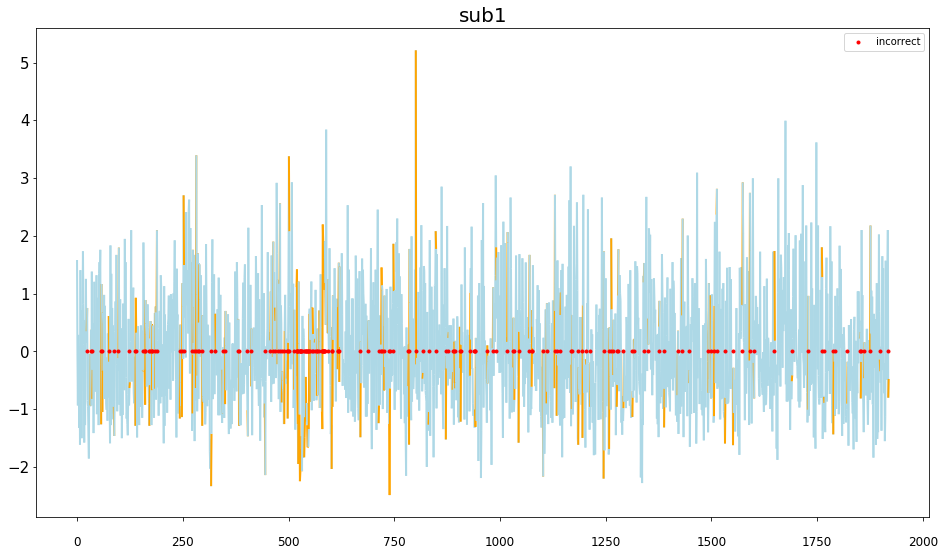

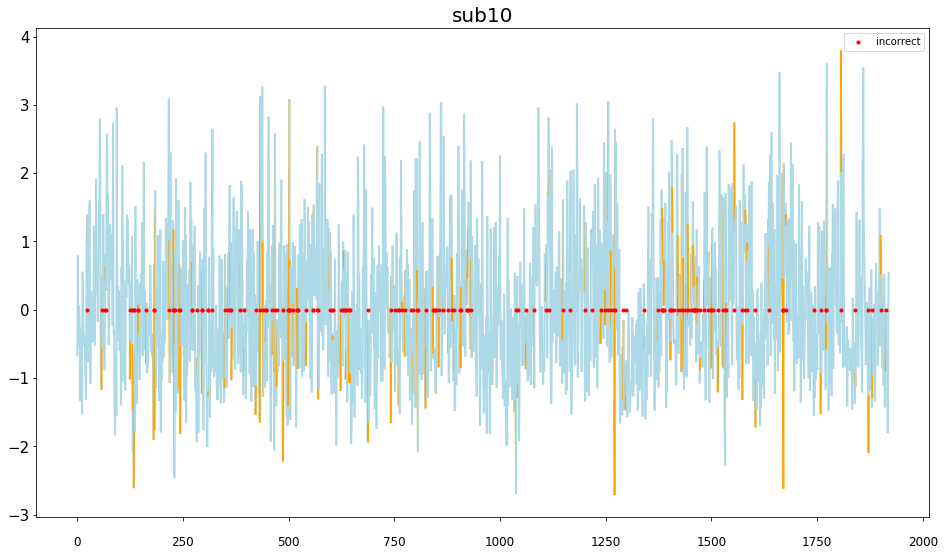

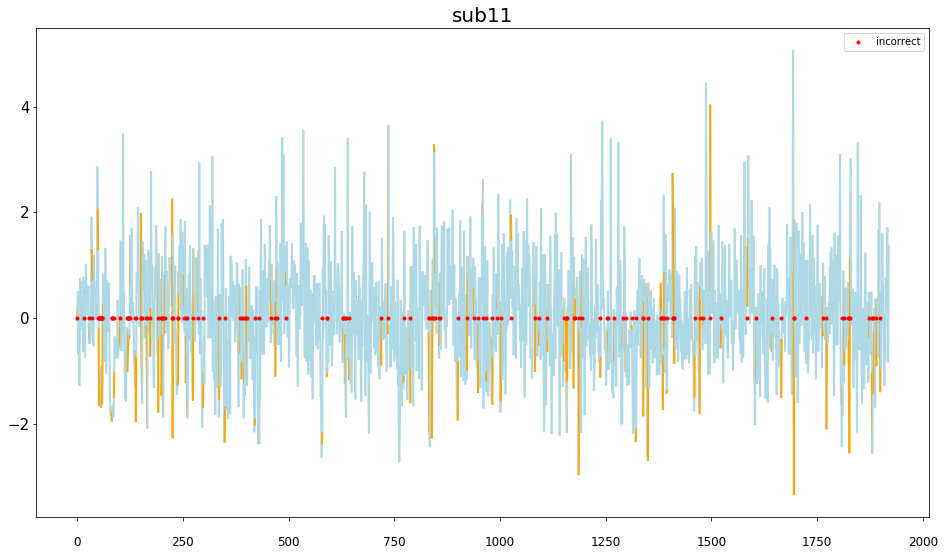

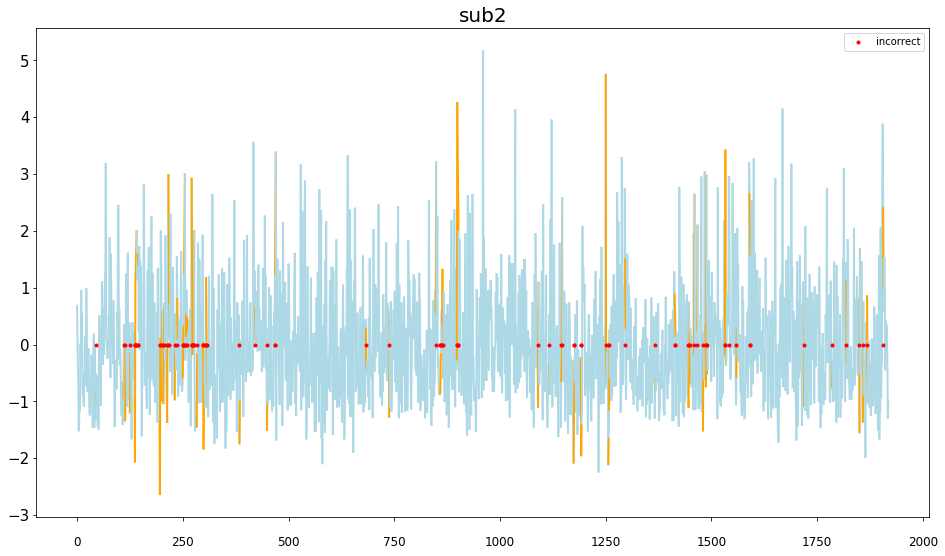

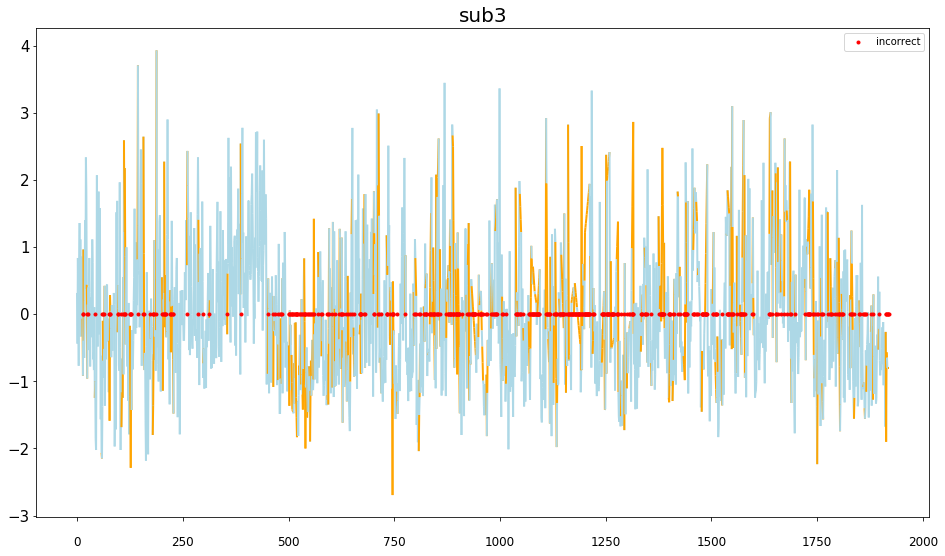

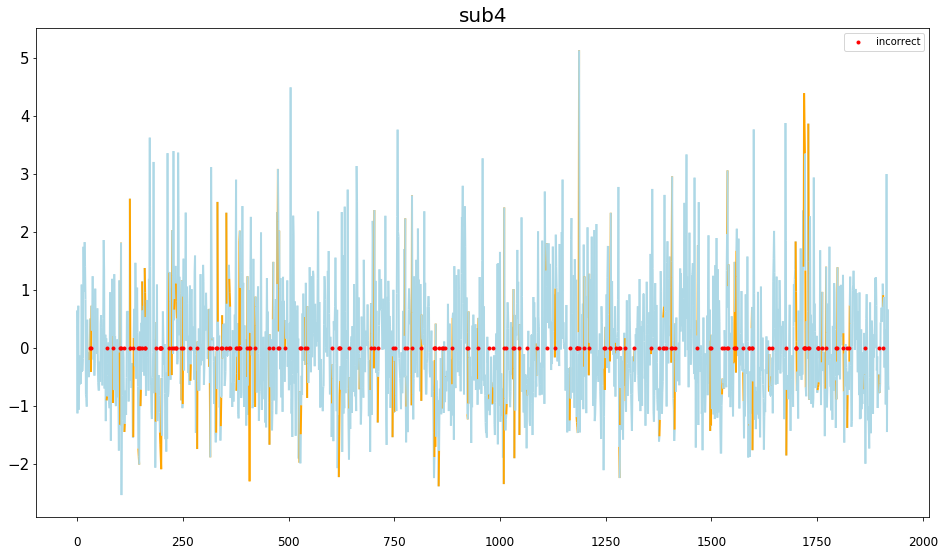

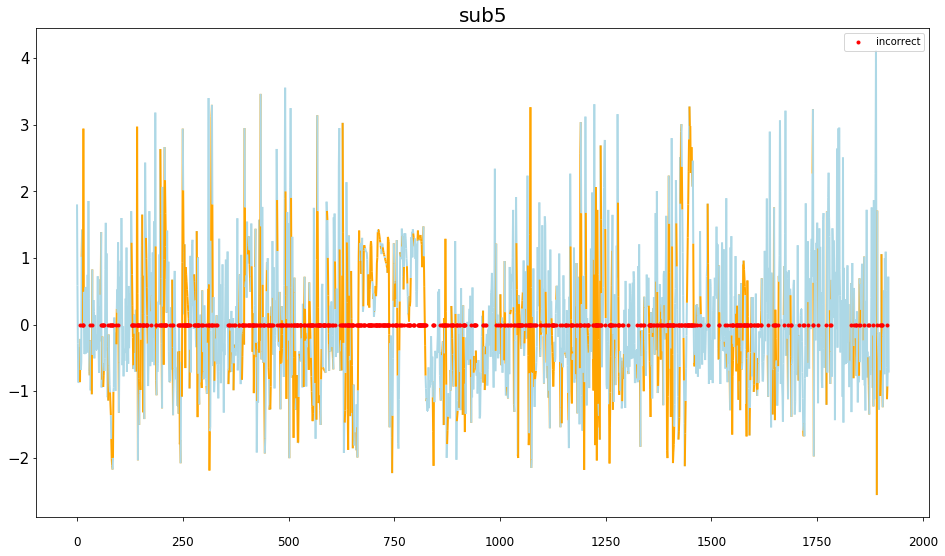

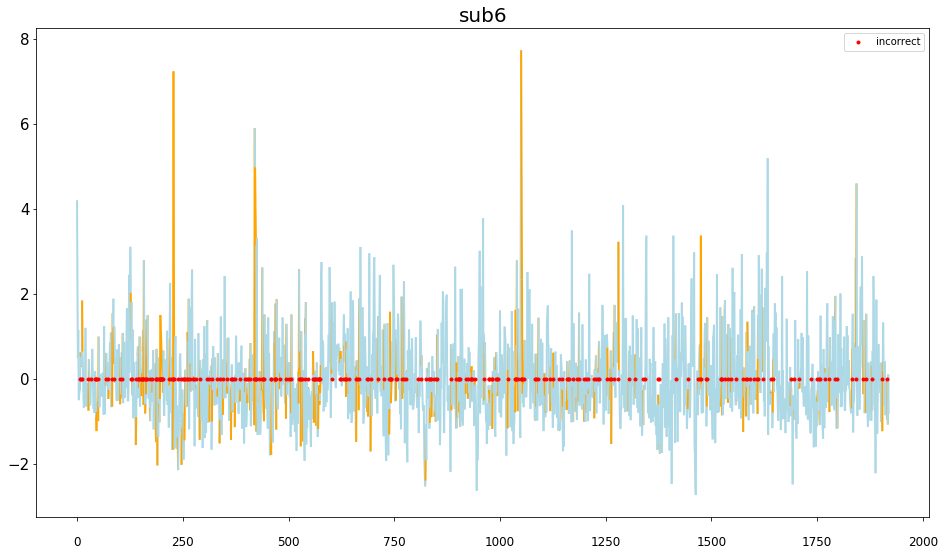

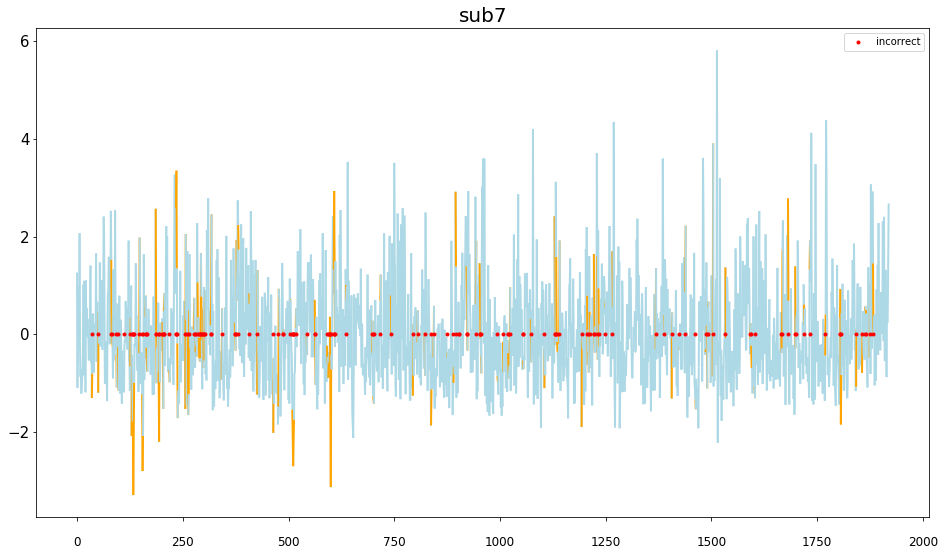

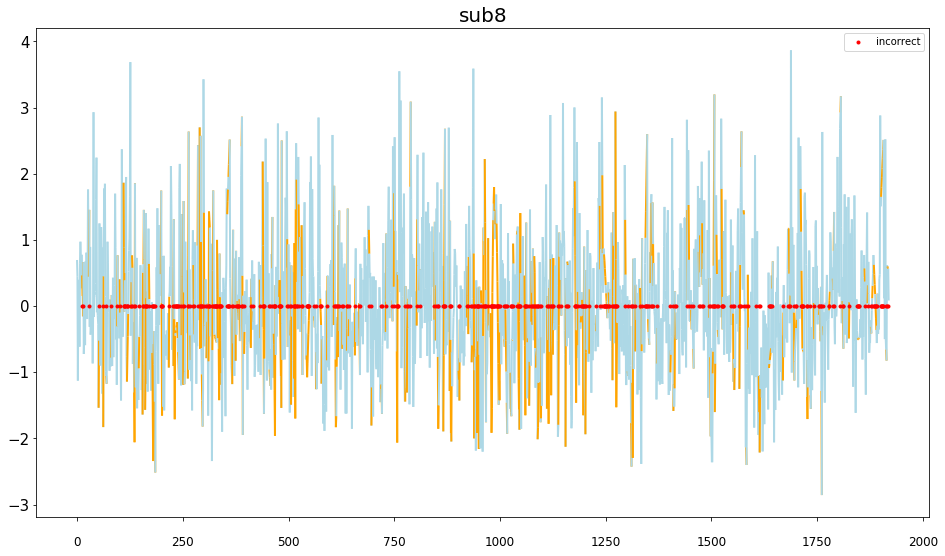

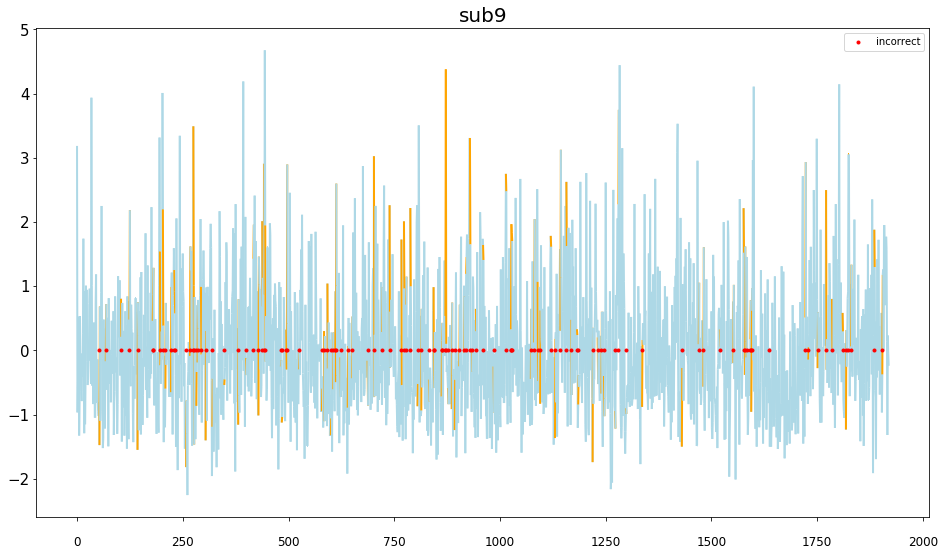

FileNotFoundError: [Errno 2] No such file or directory: '~$sub11.xlsx'

In [96]:
for sub in subs_excel:
    sub_df = pd.read_excel(sub)
    # grabbing all the data that needs new rawRTs
    sub_df['short_incorrect'] = np.where(((sub_df['ACC'] == 0) & (sub_df['rawRTs'] <= 200) | 
                                          (sub_df['rawRTs'] <= 200)), True, False)
    sub_df['RTs'] = sub_df['rawRTs']
    
    # change the RTs 0 if the first one is 0 to the mean
    if sub_df['RTs'][0] == 0:
        sub_df.loc[0, 'RTs'] = np.mean(sub_df['RTs'][1:])
        sub_df.loc[0, 'short_incorrect'] = False
        
        
    # replace all the short and incorrect and interpolate
    sub_df.loc[(sub_df['short_incorrect']==True), 'RTs'] = np.nan
    # linear can be different interpolation methods
    sub_df['RTs'] = sub_df.RTs.interpolate('linear')
    # this checks if there are values that are out of the normal after interpolation
    assert len([val for val in sub_df['RTs'] if val >= 1000 or val <=200]) == 0

    
    
    sub_df['zscore'] = 0
    sub_df['abs_zscore'] = 0

    # z-score by block
    for block_num in set(sub_df['Block']):
        sub_df.loc[sub_df['Block'] == block_num, 'zscore'] = stats.zscore(sub_df[sub_df['Block'] == block_num]['RTs'])
        sub_df.loc[sub_df['Block'] == block_num, 'abs_zscore'] = abs(stats.zscore(sub_df[sub_df['Block'] == block_num]['RTs']))

    nperseg = 320
    
    # construct some data
    
    x = range(len(sub_df['zscore']))          # resampledTime
    y = sub_df['zscore'][:]     # modulusOfZeroNormalized
    annotation = sub_df['ACC'][:] == 1

    # set up colors 
    c = ['lightblue' if a else 'orange' for a in annotation]

    # convert time series to line segments
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], y[:-1], x[1:], y[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))
    # plot data
    fig, ax = plt.subplots(1)
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    ax.plot(sub_df['ACC'][:][sub_df['ACC'] == 0],'.', color='r', label='incorrect')

    ax.set_title(sub.split('.')[0], fontsize=20)
    ax.legend(loc='best')
    plt.show()
    
    # compute the psd
#     f_axis, t_axis, spg = sp.spectrogram(sub_df[['zscore']],nperseg=320,noverlap=0)
#     psd = np.mean(spg,axis=-1)
#     plt.plot(psd[:320][:,0])

### Incorrect percentages

In [98]:
for sub in subs_excel:
    sub_df = pd.read_excel(sub)
    print(sub.split('.')[0])
    shortRT_count = len([val for val in sub_df['rawRTs'] if (val <= 200) or (val>=1000)])
    shortRT_percentage = float(shortRT_count)/sub_df.shape[0]
    wrong_count = sub_df.shape[0] - sum(sub_df['ACC'])
    incorrect_percentage = float(wrong_count)/sub_df.shape[0]
    print(shortRT_percentage, incorrect_percentage)

sub1
0.00625 0.090625
sub10
0.042708333333333334 0.08385416666666666
sub11
0.022916666666666665 0.07708333333333334
sub2
0.018229166666666668 0.04895833333333333
sub3
0.13958333333333334 0.24635416666666668
sub4
0.004166666666666667 0.08229166666666667
sub5
0.184375 0.31666666666666665
sub6
0.007291666666666667 0.12604166666666666
sub7
0.03697916666666667 0.08020833333333334
sub8
0.1171875 0.21302083333333333
sub9
0.0078125 0.06197916666666667


FileNotFoundError: [Errno 2] No such file or directory: '~$sub11.xlsx'